# Analyze a Single Simulation Grid via Cell Colors

In [36]:
# imports
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from simulation import Simulation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# set plotting style
plt.style.use(['default', 'biophysics.mplstyle'])

# import simulation data to the Simulation class
sim_file = Path('paper_data2/fig4/fig4_true/true_sim_10_1.mat')
# sim_file = data_dir / 'sim_250_1.mat'
sim = Simulation(mat_file=sim_file, skip_check=True)
sim.set_color_dict({
    sim.get_grid_type('tau'): 'tab:blue',
    sim.get_grid_type('map6'): 'tab:orange',
    sim.get_grid_type('empty'): 'white',
    sim.get_grid_type('notexist'): 'grey',
})

# define figure save directory
fig_dir = Path('paper_figures') / sim_file.parents[0].parts[-1]
fig_dir.mkdir(parents=True, exist_ok=True)

paper_figures/fig4_true/inset_simulation_image_of_true_sim_10_1.pdf


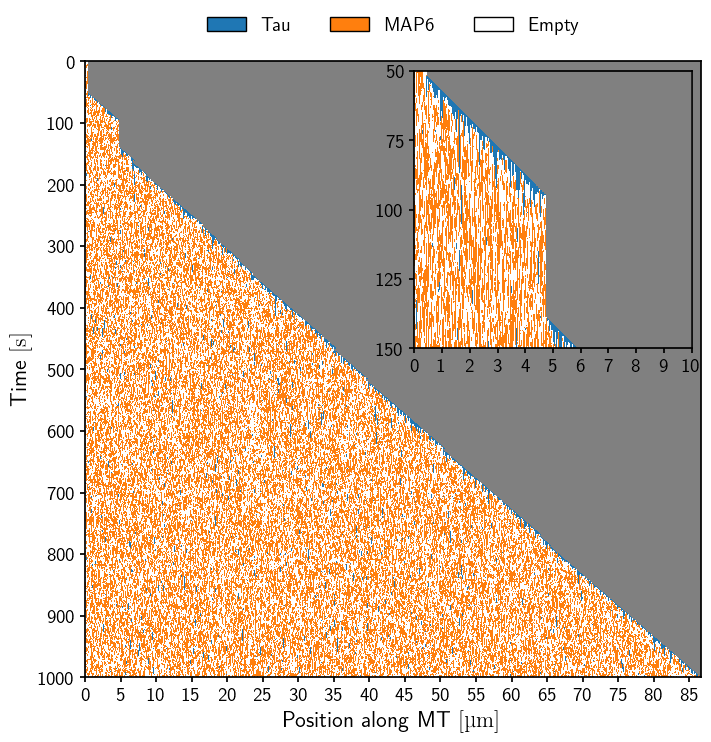

In [ ]:
# make a plot that uses cell coloring to analyze a 2D array
fig, ax = plt.subplots()

# get the raw grid and time vec
time = sim.get_time_vec()
grid = sim.get_raw_grid()

# create custom cmap from color_dict
color_dict = sim.get_color_dict()
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'custom-cmap',
    [color_dict[0], color_dict[1], color_dict[2], color_dict[3]]
)

# generate the grid plot
# force a square ratio by calculating the aspect ratio
aspect = grid.shape[1] / grid.shape[0]
ax.imshow(grid, cmap=cmap, interpolation='none', aspect=aspect)

# change axis limits
ax.set_xlim(0, grid.shape[1])
ax.set_ylim(grid.shape[0], 0)

# rescale the y-axis from steps to time
tick_interval = 100
tick_count = int(np.floor(time[-1] / tick_interval))
labels = np.arange(0, tick_count+1) * tick_interval
label_positions = labels / time[-1] * grid.shape[0]
ax.set_yticks(ticks=label_positions, labels=labels)

# rescale the x-axis from domains to position
tick_interval = 5
tick_count = int(np.floor(sim.get_max_length() / tick_interval))
labels = np.arange(0, tick_count+1) * tick_interval
label_positions = labels / sim.get_max_length() * grid.shape[1]
ax.set_xticks(ticks=label_positions, labels=labels)

# add plot labels
ax.set_xlabel(r"Position along MT $\left[\qty{}{\micro\meter}\right]$")
ax.set_ylabel(r"Time $\left[\qty{}{\second}\right]$")

# add a legend
handles = [
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('tau')], label='Tau', edgecolor='black'),
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('map6')], label='MAP6', edgecolor='black'),
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('empty')], label='Empty', edgecolor='black'),
]
ax.legend(
    handles=handles,
    loc='upper center',
    ncols=3,
    bbox_to_anchor=(0.5, 1.1),
)


# add inset plot
# [second]
zoomed_time = (50, 150)
# [micrometer]
zoomed_pos = (0, 10)

# convert to steps
zoomed_time_step = (int(zoomed_time[0] / sim.get_param('dt')), int(zoomed_time[1] / sim.get_param('dt')))
zoomed_pos_step = (int(zoomed_pos[0] / sim.get_param('dx')), int(zoomed_pos[1] / sim.get_param('dx')))

# create a trimmed version of the simulation grids
zoomed_grid = grid[zoomed_time_step[0]:zoomed_time_step[1], zoomed_pos_step[0]:zoomed_pos_step[1]]

# add the trimmed grid to the inset plot by imshow
ax_inset = inset_axes(ax, width="45%", height="45%", loc='upper right')

# generate the grid plot
aspect = zoomed_grid.shape[1] / zoomed_grid.shape[0]
ax_inset.imshow(zoomed_grid, cmap=cmap, interpolation='none', aspect=aspect)

# change axis limits
ax_inset.set_xlim(0, zoomed_grid.shape[1])
ax_inset.set_ylim(zoomed_grid.shape[0], 0)

# rescale the y-axis from steps to time
tick_interval = 25
tick_count = int(np.floor((zoomed_time[1] - zoomed_time[0]) / tick_interval))
labels = np.arange(0, tick_count+1) * tick_interval + zoomed_time[0]
label_positions = (labels - zoomed_time[0]) / (zoomed_time[1] - zoomed_time[0]) * zoomed_grid.shape[0]
ax_inset.set_yticks(ticks=label_positions, labels=labels)

# rescale the x-axis from domains to position
tick_interval = 1
tick_count = int(np.floor((zoomed_pos[1] - zoomed_pos[0]) / tick_interval))
labels = np.arange(0, tick_count+1) * tick_interval + zoomed_pos[0]
label_positions = (labels - zoomed_pos[0]) / (zoomed_pos[1] - zoomed_pos[0]) * zoomed_grid.shape[1]
ax_inset.set_xticks(ticks=label_positions, labels=labels)


# save the figure
fig_file = fig_dir / f"inset_simulation_image_of_{sim.get_name()}.pdf"
# print(fig_file)
# fig.savefig(fig_file)

In [40]:
fig.savefig(fig_file, dpi=100)
print(fig_file)

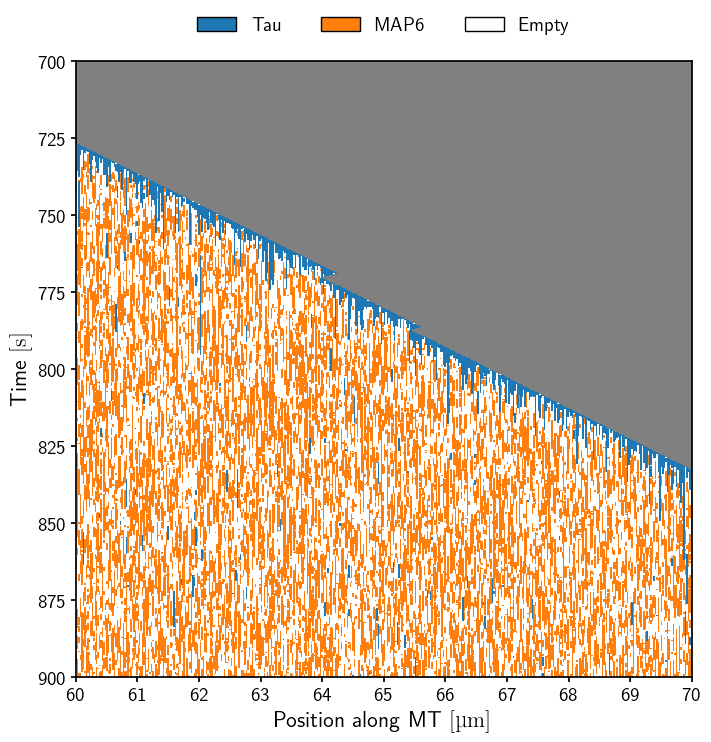

In [44]:
# make a plot that uses cell coloring to analyze a 2D array
fig, ax = plt.subplots()

# get the raw grid and time vec
time = sim.get_time_vec()
grid = sim.get_raw_grid()

# create custom cmap from color_dict
color_dict = sim.get_color_dict()
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'custom-cmap',
    [color_dict[0], color_dict[1], color_dict[2], color_dict[3]]
)

# [second]
zoomed_time = (700, 900)
# [micrometer]
zoomed_pos = (60, 70)

# convert to steps
zoomed_time_step = (int(zoomed_time[0] / sim.get_param('dt')), int(zoomed_time[1] / sim.get_param('dt')))
zoomed_pos_step = (int(zoomed_pos[0] / sim.get_param('dx')), int(zoomed_pos[1] / sim.get_param('dx')))

# create a trimmed version of the grid
zoomed_grid = grid[zoomed_time_step[0]:zoomed_time_step[1], zoomed_pos_step[0]:zoomed_pos_step[1]]

# generate the grid plot
aspect = zoomed_grid.shape[1] / zoomed_grid.shape[0]
ax.imshow(zoomed_grid, cmap=cmap, interpolation='none', aspect=aspect)

# change axis limits
ax.set_xlim(0, zoomed_grid.shape[1])
ax.set_ylim(zoomed_grid.shape[0], 0)

# rescale the y-axis from steps to time
tick_interval = 25
tick_count = int(np.floor((zoomed_time[1] - zoomed_time[0]) / tick_interval))
labels = np.arange(0, tick_count+1) * tick_interval + zoomed_time[0]
label_positions = (labels - zoomed_time[0]) / (zoomed_time[1] - zoomed_time[0]) * zoomed_grid.shape[0]
ax.set_yticks(ticks=label_positions, labels=labels)

# rescale the x-axis from domains to position
tick_interval = 1
tick_count = int(np.floor((zoomed_pos[1] - zoomed_pos[0]) / tick_interval))
labels = np.arange(0, tick_count+1) * tick_interval + zoomed_pos[0]
label_positions = (labels - zoomed_pos[0]) / (zoomed_pos[1] - zoomed_pos[0]) * zoomed_grid.shape[1]
ax.set_xticks(ticks=label_positions, labels=labels)

# add plot labels
ax.set_xlabel(r"Position along MT $\left[\qty{}{\micro\meter}\right]$")
ax.set_ylabel(r"Time $\left[\qty{}{\second}\right]$")
# ax.set_title(f"Simulation image of ``{sim.get_name()}\'\'")

# add a legend
handles = [
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('tau')], label='Tau', edgecolor='black'),
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('map6')], label='MAP6', edgecolor='black'),
    mpl.patches.Patch(facecolor=color_dict[sim.get_grid_type('empty')], label='Empty', edgecolor='black'),
]
ax.legend(
    handles=handles,
    loc='upper center',
    ncols=3,
    bbox_to_anchor=(0.5, 1.1),
)

# save the figure
fig_file = fig_dir / f"zoomed_simulation_image_of_{sim.get_name()}.pdf"
# print(fig_file)
# fig.savefig(fig_file)

In [ ]:
fig.savefig(fig_file)
print(fig_file)

paper_figures/fig4_true/zoomed_simulation_image_of_true_sim_10_1.pdf
